## Impoting the libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import model_selection
from sklearn import ensemble
from sklearn import pipeline

## Importing the dataset

In [3]:
df = pd.read_csv('../input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory data Analysis

## Checking the number of features in the dataset

In [3]:
## Number of records 
print(df.shape[0])

284807


In [4]:
## Number of features 
print(df.shape[1]-1)

30


We have around 28500 records and 30 features

## Checking the data type of each features

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Checking the null values

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in the dataset

## Time

In [7]:
df_class_0=df[df.Class==0]
df_class_1=df[df.Class==1]

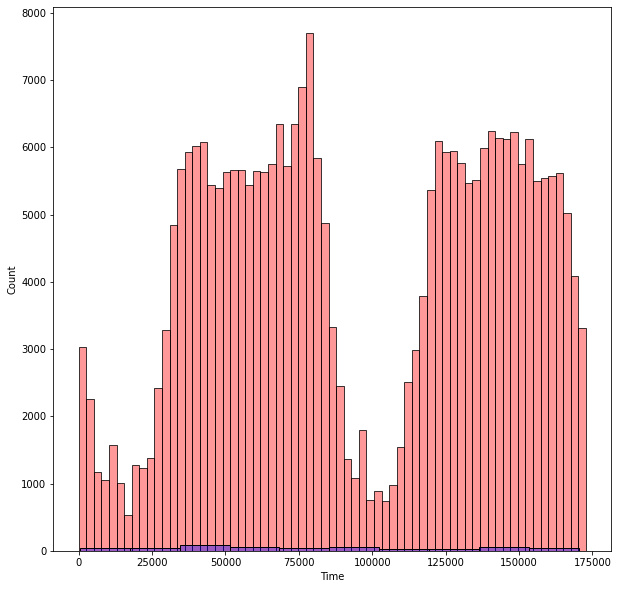

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
for a,c in zip([df_class_0,df_class_1],['r','b']):
    sns.histplot(data=a,x='Time',ax=ax,color=c,alpha=0.4)


We can see that the time taken for both type of transactions is same. So time is not a parameter on which the class of transaction depend 

## Amount

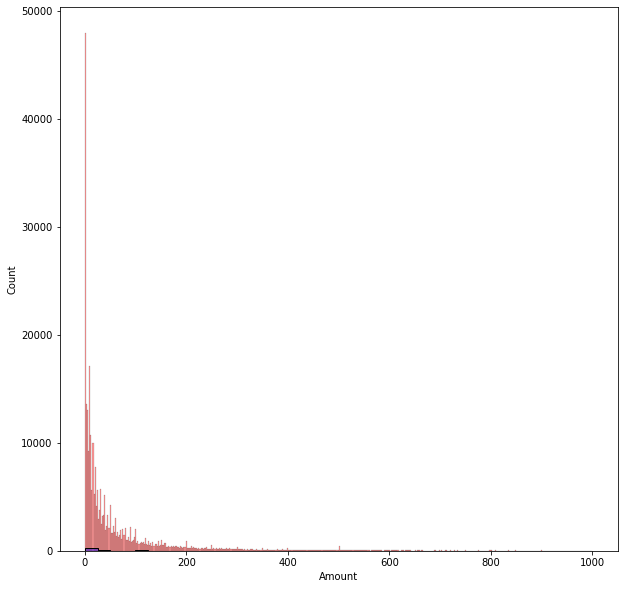

In [9]:
fig,ax = plt.subplots(figsize=(10,10))

for a,c in zip([df_class_0[df_class_0.Amount<1000],df_class_1[df_class_1.Amount<1000]],['r','b']):
    sns.histplot(data=a,x='Amount',ax=ax,color=c,alpha=0.4)

In [10]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
df.Amount.quantile(q=0.99)
# We see that for nearly 99% transactions the amount is less than 1018 So this clearly means that we have a outlier let us check the data for this outlier 

1017.9700000000012

In [12]:
df[df.Amount>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [13]:
# We see that we have only 7 transaction which are more than 10000 amount

In [14]:
# Let us build a simple model first using randomforestclassifier

In [15]:
X = df.drop('Class',axis=1)
y = df.Class.values

In [16]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
scale_columns = ['Time','Amount']
preprocess = make_column_transformer((StandardScaler(),scale_columns),remainder='passthrough')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
logreg = LogisticRegression()
pipe = make_pipeline(preprocess,logreg)
score = np.mean(cross_val_score(pipe,X_train,y_train,cv=5,scoring='roc_auc'))
print(score)

0.9731205028914897


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
pipe.fit(X_train,y_train)
print(accuracy_score(y_train,pipe.predict(X_train)))

0.9992451008360947


In [18]:
print(accuracy_score(y_test,pipe.predict(X_test)))

0.9991748885221726


In [19]:
# We are getting a high roc_auc_score and a high accuracy for test set

In [20]:
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'Predicted')

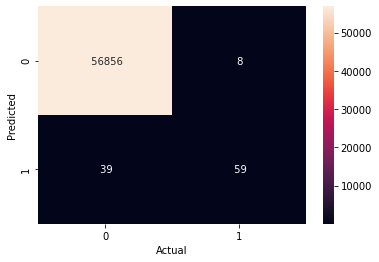

In [21]:
ax = sns.heatmap(cm,fmt=' ',annot=True)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

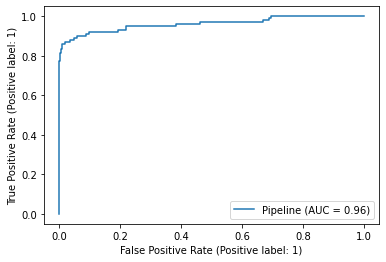

In [22]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(pipe,X_test,y_test)
plt.show()

We have build a really good model.